In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GRU

In [3]:
# Load the dataset
df = pd.read_excel('../dataset/Dataset_IoV.xlsx')  # Replace with your dataset path

# Separating features and target
X = df[['Number of Lanes', 'Status of driver', 'Nature of environment', 'Velocity of vehicle', 'Distance between vehicles', 'Breaking capability']]
y = df['Collussion']

# Normalize the features
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = X

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
print(X_train.shape, y_train.shape,X_scaled.shape)

(165420, 1, 6) (165420,) (206775, 1, 6)


In [5]:
def build_drnn_lstm():
    model = Sequential()

    # Add a SimpleRNN layer (Deep RNN part)
    model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

    # Add an LSTM layer
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    # Add another LSTM layer
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [6]:
# Instantiate and train the model
model = build_drnn_lstm()
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
4136/4136 [==============================] - 87s 19ms/step - loss: 0.0481 - accuracy: 0.9806 - val_loss: 0.0093 - val_accuracy: 0.9997
Epoch 2/5
4136/4136 [==============================] - 78s 19ms/step - loss: 0.0050 - accuracy: 0.9997 - val_loss: 0.0023 - val_accuracy: 0.9998
Epoch 3/5
4136/4136 [==============================] - 77s 19ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 8.4618e-04 - val_accuracy: 1.0000
Epoch 4/5
4136/4136 [==============================] - 77s 19ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 5.5358e-04 - val_accuracy: 1.0000
Epoch 5/5
4136/4136 [==============================] - 79s 19ms/step - loss: 7.5951e-04 - accuracy: 0.9999 - val_loss: 4.9544e-04 - val_accuracy: 1.0000


In [7]:
import numpy as np

# Set numpy to display full float numbers
np.set_printoptions(suppress=True, precision=10)

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.2f}')

1293/1293 [==============================] - 10s 8ms/step - loss: 1.9806e-04 - accuracy: 1.0000
Test Accuracy: 1.00


In [9]:

from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.16f}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.16f}')

1293/1293 [==============================] - 8s 5ms/step
Mean Squared Error (MSE): 0.0000009143930122
Root Mean Squared Error (RMSE): 0.0009562389932433


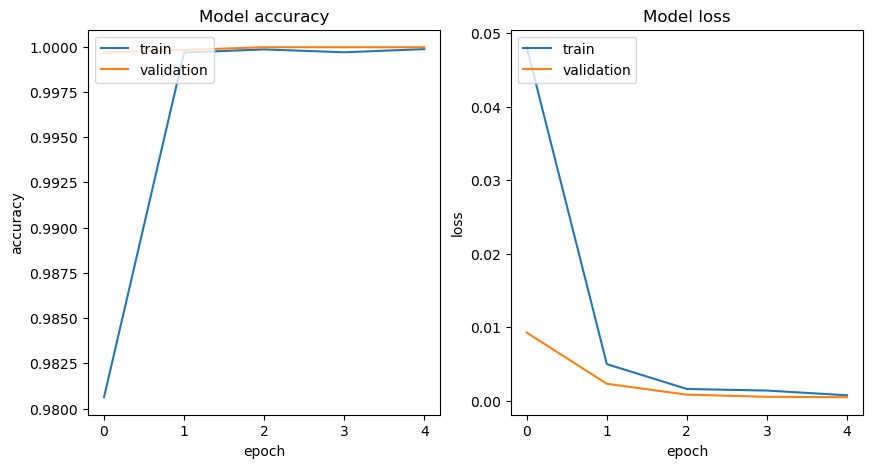

In [11]:
#visualizing the loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()
